# กฎของเกาส์ (Gauss' Law)

## สนามไฟฟ้าเนื่องจากประจุรูปวงกลม

### การใช้ฟังก์ชันพาราเมตริก (Parametric Function) สำหรับสร้างประจุรูปวงกลม
$$\mathbf{r'}=
\begin{bmatrix}
l\cos(t)\\
l\sin(t)
\end{bmatrix},\quad 0<t<2\pi$$
เมื่อ $l$ คือ รัศมีของวงกลม

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid', 'notebook'])

Text(0, 0.5, 'y')

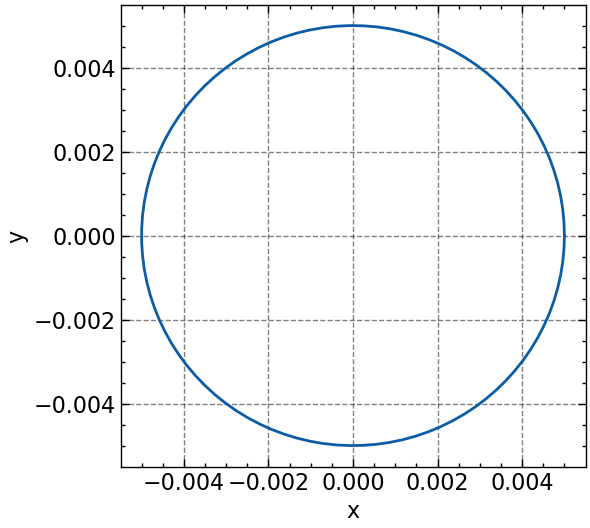

In [12]:
# plot ประจุรูปวงกลมโดยใช้ parameter t
t = np.linspace(0, 2.0 * np.pi, 100)
l = 0.5e-2 # รัศมี 0.5 cm
x = l * np.cos(t)
y = l * np.sin(t)

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

## สนามไฟฟ้าจากประจุรูปแบบใด ๆ
$$\mathbf{dE}=\frac{dq}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$
$$\mathbf{E(r)}=\int\mathbf{dE}$$

Line Charge Definition
$$dq=\rho_l(r')d\mathbf{r'}$$

Parameterised
$$dq=\rho_l(r')\left\|\frac{d\mathbf{r'}}{dt}\right\|dt$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

หาสนามไฟฟ้าเนื่องจากประจุแบบวงกลม รัศมี $2.5~cm$ ที่มีประจุรวม $Q=1~\mu C$ 

In [2]:
# ความหนาแน่นประจุ
Q = 1e-6
radius = 2.5e-2
rho_l = Q / (2.0 * pi * radius)
rho_l

6.366197723675813e-06

In [3]:
x, y, t = smp.symbols('x y t')
r = smp.Matrix([x, y])
rp = smp.Matrix([radius * smp.cos(t), radius * smp.sin(t)])
R = r - rp
R

Matrix([
[x - 0.025*cos(t)],
[y - 0.025*sin(t)]])

In [4]:
dqdt = rho_l * smp.diff(rp, t).norm()
dqdt

1.59154943091895e-7*sqrt(Abs(sin(t))**2 + Abs(cos(t))**2)

ทดลองอินทิเกรตเพื่อหาประจุรวม $\int_0^{2\pi}\frac{dq}{dt}\,dt$

In [5]:
smp.integrate(dqdt, [t, 0, 2.0 * np.pi])

1.00000000000000e-6

In [6]:
# หา dEdt
dEdt = dqdt / (4.0 * pi * epsilon_0) * R / R.norm()**3
dEdt

Matrix([
[1430.41329403279*(x - 0.025*cos(t))*sqrt(Abs(sin(t))**2 + Abs(cos(t))**2)/(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)**(3/2)],
[1430.41329403279*(y - 0.025*sin(t))*sqrt(Abs(sin(t))**2 + Abs(cos(t))**2)/(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)**(3/2)]])

In [7]:
# Integrate
smp.integrate(dEdt, [t, 0, 2.0 * np.pi])

Matrix([
[1430.41329403279*Integral(1.0*x*sqrt(sin(t)**2 + cos(t)**2)/(sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(x - 0.025*cos(t))**2 + sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(y - 0.025*sin(t))**2), (t, 0, 6.28318530717959)) + 1430.41329403279*Integral(-0.025*sqrt(sin(t)**2 + cos(t)**2)*cos(t)/(sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(x - 0.025*cos(t))**2 + sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(y - 0.025*sin(t))**2), (t, 0, 6.28318530717959))],
[1430.41329403279*Integral(1.0*y*sqrt(sin(t)**2 + cos(t)**2)/(sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(x - 0.025*cos(t))**2 + sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(y - 0.025*sin(t))**2), (t, 0, 6.28318530717959)) + 1430.41329403279*Integral(-0.025*sqrt(sin(t)**2 + cos(t)**2)*sin(t)/(sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(t))**2)*Abs(x - 0.025*cos(t))**2 + sqrt(Abs(x - 0.025*cos(t))**2 + Abs(y - 0.025*sin(

Symbolic Integration หาคำตอบไม่ได้ ดังนั้น ควรใช้ Numerical Integration

In [7]:
dExdt = smp.lambdify([t, x, y], dEdt[0])
dEydt = smp.lambdify([t, x, y], dEdt[1])

In [8]:
def E(x, y):
    Ex = quad(dExdt, 0, 2.0 * np.pi, args=(x, y))[0]
    Ey = quad(dEydt, 0, 2.0 * np.pi, args=(x, y))[0]
    return np.array([Ex, Ey])

In [9]:
E(1, 2)

array([ 803.9464421 , 1607.89288419])

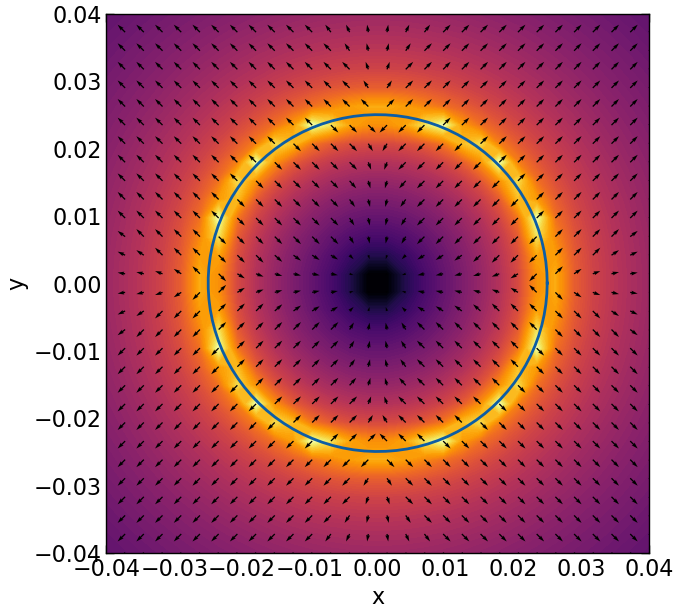

In [12]:
# Plot field
fig = plt.figure(figsize=(7, 7))
ax = field_plot(E, x_min=-4e-2, x_max=4e-2, y_min=-4e-2, y_max=4e-2, num_grids=30, contour=True, cmap='inferno')

# Plot the charge
t = np.linspace(0, 2.0 * np.pi, 100)
l = 2.5e-2 
x = l * np.cos(t)
y = l * np.sin(t)
plt.plot(x, y)
plt.show()